In [15]:
%pylab inline
from wallet.util.analysis import Analysis
domestic_large = ['SCHX','IVV','SPYG','SCHG','SCHV','VTV','SPYD']
domestic_mid = ['SCHK','VONE','SCHM','VO','VOT','VOE']
domestic_small = ['SCHA','SPSM','VBK','VBR','DES','SMLV']
domestic = domestic_large + domestic_mid + domestic_small
international_developed = ['SPDW','SCHF','EFG','IVLU','SCZ','SCHC','HDEF','EFAV']
international_others = ['IEUR','VPL','SCHE','SPEM']
international = international_developed + international_others
bond = ['ICVT','EMLC','HYLB','IGLB','MLN','VGLT','SCHP']
assets = ['GLTR','GLDM','SIVR','DBA','DBO','SCHH','USRT']
ana = Analysis(domestic + international + bond + assets, 50, 5)
print(ana)
stats0 = ana.screen(std_skew=False)

Populating the interactive namespace from numpy and matplotlib
from 2019-11-12 to 2020-01-31 - 46 symbols


In [2]:
stats0.loc[{*domestic} & {*stats0.index}].sort_values('shrp', ascending=False)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
SPYG,50.0,0.156161,0.216132,-0.496945,0.051285,0.238849,0.319440,0.475860,0.685807,7.716803,2.613640,-1.046468
VOT,50.0,0.136595,0.237304,-0.501352,0.019329,0.208686,0.295273,0.478832,0.542167,6.669398,3.344158,-1.039068
VONE,50.0,0.108050,0.210258,-0.478054,0.026306,0.178312,0.241435,0.385450,0.476146,4.865548,2.889980,-1.074932
SCHX,50.0,0.107916,0.211844,-0.490507,0.017158,0.168554,0.250104,0.382839,0.471951,4.864689,2.976416,-1.115132
SCHK,50.0,0.106972,0.212718,-0.504459,0.024156,0.164476,0.245850,0.394971,0.465573,4.819269,3.006128,-1.127833
IVV,50.0,0.105070,0.214535,-0.519061,0.037493,0.175362,0.250057,0.386027,0.452764,4.708504,3.076465,-1.122801
VBK,50.0,0.115650,0.258602,-0.535109,-0.047728,0.168994,0.291199,0.571180,0.416522,4.835518,4.012599,-0.645892
VO,50.0,0.097374,0.225167,-0.494568,0.010197,0.158674,0.265559,0.456999,0.397205,4.314179,3.381170,-1.001701


In [3]:
stats0.loc[{*international} & {*stats0.index}].sort_values('shrp', ascending=False)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
EFG,50.0,0.063259,0.219611,-0.589659,-0.027306,0.111796,0.189882,0.476036,0.251911,2.339792,3.722508,-1.047107
EFAV,50.0,0.041595,0.137031,-0.359731,-0.020131,0.070857,0.122767,0.306438,0.245629,1.519755,1.914187,-0.996972
IEUR,50.0,0.051324,0.256498,-0.673914,-0.076434,0.055470,0.185293,0.740420,0.169152,1.712867,3.781850,-0.121296
SCHC,50.0,0.051077,0.258578,-0.673281,-0.050720,0.073528,0.249772,0.536883,0.166838,1.445091,4.813754,-0.923111
SCZ,50.0,0.044772,0.236059,-0.611976,-0.039322,0.076682,0.179592,0.472900,0.156044,1.218929,4.662636,-1.031041
SPDW,50.0,0.034070,0.235333,-0.639889,-0.052783,0.045005,0.177842,0.554231,0.111049,0.366243,4.122094,-0.675983
SCHE,50.0,0.054573,0.461051,-1.369268,-0.083014,0.129559,0.297059,0.873250,0.101152,0.345489,8.646345,-0.982258
SPEM,50.0,0.051082,0.442351,-1.285578,-0.110965,0.133264,0.280076,0.794725,0.097538,0.352755,8.434675,-1.020197
SCHF,50.0,0.031261,0.241616,-0.648967,-0.047875,0.032773,0.166767,0.577329,0.096534,0.150795,4.249709,-0.622148


In [4]:
stats0.loc[{*bond,*assets} & {*stats0.index}].sort_values('shrp', ascending=False)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
ICVT,50.0,0.149605,0.166257,-0.239624,0.060376,0.155414,0.269983,0.389914,0.852109,7.712600,1.591664,-0.512414
IGLB,50.0,0.111800,0.126227,-0.107575,0.002983,0.121281,0.189355,0.358783,0.822833,6.922582,1.263272,-0.025229
MLN,50.0,0.059094,0.062979,-0.075829,0.025606,0.051926,0.102032,0.189501,0.812295,3.731663,0.472586,-0.072207
GLTR,50.0,0.199520,0.276818,-0.335104,-0.019357,0.199958,0.384287,0.764763,0.692090,12.009459,2.018967,0.100281
SCHP,50.0,0.049198,0.069509,-0.070279,-0.009712,0.049266,0.100408,0.190537,0.593612,3.191107,0.664919,0.373349
GLDM,50.0,0.146381,0.241860,-0.321668,-0.034109,0.135540,0.293191,0.731262,0.572417,8.797249,1.594388,0.387913
VGLT,50.0,0.109817,0.276609,-0.448049,-0.086504,0.109939,0.282331,0.854583,0.368318,7.787703,3.534144,0.387272
HYLB,50.0,0.034783,0.097476,-0.241659,-0.010737,0.035706,0.094254,0.211849,0.275420,1.532415,1.303060,-0.364003
EMLC,50.0,0.047174,0.143735,-0.230837,-0.047132,0.049177,0.177745,0.307915,0.272985,1.912675,1.438209,-0.039185


In [ ]:
########################################

In [5]:
ana.setup_mask({*domestic} & {*stats0.index})
ana.optimize_iteration([100], max_count=2)

([(0.42, {'VO': 0.3375, 'VBK': 0.6625}),
  (0.472, {'SCHX': 1}),
  (0.4761, {'VONE': 1}),
  (0.6858, {'SPYG': 1}),
  (0.7212, {'SCHG': 1})],
 [(0, 0, [[{'VO': 34, 'VBK': 66}, set()]])])

In [7]:
ana.setup_mask({'SCHG',*domestic_small} & {*stats0.index})
s = ana.data.rolling(5).mean().pct_change().corr().loc['SCHG'].sort_values()
print(s[s < .8])
stats0.loc[['SCHG',*s[s < .8].index]]

Symbols
SMLV    0.664992
VBR     0.739676
SPSM    0.748619
SCHA    0.752645
Name: SCHG, dtype: float64


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
SMLV,50.0,0.021007,0.221375,-0.574899,-0.133610,0.050998,0.157650,0.391165,0.059042,-0.788520,4.265824,-0.435860
VBR,50.0,0.025865,0.264628,-0.638137,-0.141521,0.070114,0.217062,0.444587,0.067751,-0.237596,4.739641,-0.496456
SPSM,50.0,0.051195,0.308435,-0.740649,-0.073349,0.052543,0.282176,0.498814,0.140251,0.400700,6.083305,-0.823383
SCHA,50.0,0.061346,0.284740,-0.667206,-0.075123,0.089104,0.268540,0.492692,0.187571,1.352031,5.194465,-0.618568


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
Portfolio,50.0,0.136086,0.225344,-0.502276,0.009805,0.198232,0.290319,0.433741,0.568683,6.476329,2.852800,-1.044490
SCHA,50.0,0.061346,0.284740,-0.667206,-0.075123,0.089104,0.268540,0.492692,0.187571,1.352031,5.194465,-0.618568


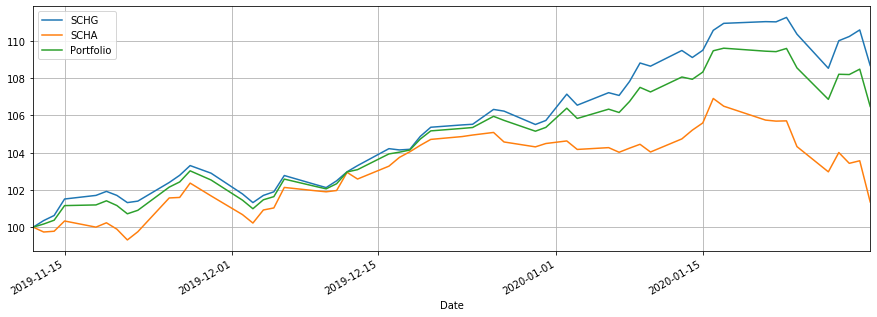

In [10]:
ana.graph({'SCHG':28,'SCHA':12})

In [ ]:
########################################

In [9]:
ana.setup_mask({*international} & {*stats0.index})
ana.optimize_iteration([100], max_count=2)

([(0.1012, {'SCHE': 1}),
  (0.156, {'SCZ': 1}),
  (0.1668, {'SCHC': 1}),
  (0.1692, {'IEUR': 1}),
  (0.1717, {'SCHC': 0.4513, 'IEUR': 0.5487}),
  (0.2456, {'EFAV': 1}),
  (0.2544, {'EFAV': 0.455, 'EFG': 0.545})],
 [(0, 0, [[{'EFAV': 46, 'EFG': 55}, set()]])])

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.053539,0.179502,-0.483751,-0.010959,0.092839,0.148004,0.372135,0.254052,1.970775,2.920676,-1.076998
EFG,50.0,0.063259,0.219611,-0.589659,-0.027306,0.111796,0.189882,0.476036,0.251911,2.339792,3.722508,-1.047107
EFAV,50.0,0.041595,0.137031,-0.359731,-0.020131,0.070857,0.122767,0.306438,0.245629,1.519755,1.914187,-0.996972


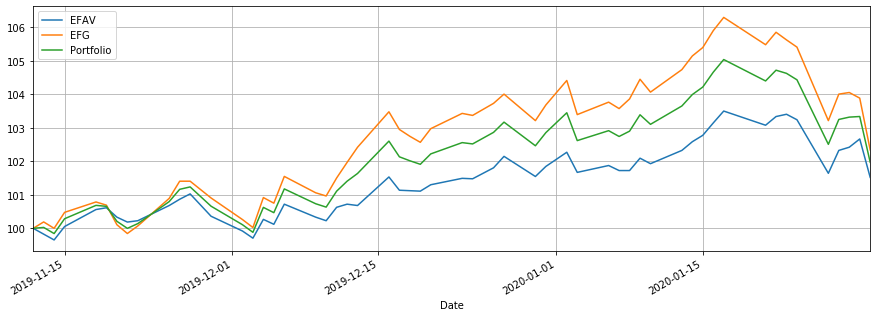

In [11]:
ana.graph({'EFG':11,'EFAV':9})

In [ ]:
########################################

In [12]:
ana.setup_mask({*bond,*assets} & {*stats0.index})
ana.optimize_iteration([100], max_count=2)

([(0.273, {'EMLC': 1}),
  (0.2754, {'HYLB': 1}),
  (0.6863, {'VGLT': 0.3596, 'EMLC': 0.6404}),
  (0.83, {'SCHP': 0.2154, 'MLN': 0.7846}),
  (0.9432, {'VGLT': 0.2683, 'HYLB': 0.7317}),
  (0.9473, {'MLN': 0.662, 'IGLB': 0.338}),
  (1.1464, {'HYLB': 0.4814, 'IGLB': 0.5186}),
  (1.1798, {'ICVT': 0.6969, 'VGLT': 0.3031}),
  (1.3712, {'ICVT': 0.3248, 'SCHP': 0.6752}),
  (1.3933, {'ICVT': 0.4369, 'IGLB': 0.5631})],
 [(0, 0, [[{'ICVT': 44, 'IGLB': 56}, set()]])])

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.126906,0.085949,-0.107462,0.077007,0.132146,0.203257,0.276418,1.384180,7.238589,1.108861,-0.473067
ICVT,50.0,0.149605,0.166257,-0.239624,0.060376,0.155414,0.269983,0.389914,0.852109,7.712600,1.591664,-0.512414
IGLB,50.0,0.111800,0.126227,-0.107575,0.002983,0.121281,0.189355,0.358783,0.822833,6.922582,1.263272,-0.025229


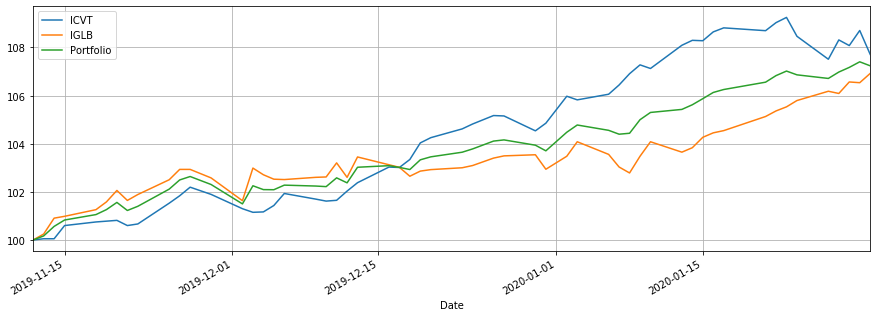

In [13]:
ana.graph({'IGLB':6,'ICVT':4})

In [ ]:
########################################

{'SCHG': 28, 'SCHA': 12, 'EFG': 11, 'EFAV': 9, 'VGLT': 20, 'SCHP': 10, 'IGLB': 6, 'ICVT': 4}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
ICVT,50.0,0.149605,0.166257,-0.239624,0.060376,0.155414,0.269983,0.389914,0.852109,7.712600,1.591664,-0.512414
Portfolio,50.0,0.104946,0.113972,-0.186981,0.028794,0.113915,0.194172,0.286302,0.851174,5.585197,1.281933,-0.620402
IGLB,50.0,0.111800,0.126227,-0.107575,0.002983,0.121281,0.189355,0.358783,0.822833,6.922582,1.263272,-0.025229
SCHG,50.0,0.167082,0.220672,-0.434987,0.043442,0.250238,0.325559,0.420010,0.721186,8.672456,2.454735,-0.950582
SCHP,50.0,0.049198,0.069509,-0.070279,-0.009712,0.049266,0.100408,0.190537,0.593612,3.191107,0.664919,0.373349
VGLT,50.0,0.109817,0.276609,-0.448049,-0.086504,0.109939,0.282331,0.854583,0.368318,7.787703,3.534144,0.387272
EFG,50.0,0.063259,0.219611,-0.589659,-0.027306,0.111796,0.189882,0.476036,0.251911,2.339792,3.722508,-1.047107
EFAV,50.0,0.041595,0.137031,-0.359731,-0.020131,0.070857,0.122767,0.306438,0.245629,1.519755,1.914187,-0.996972
SCHA,50.0,0.061346,0.284740,-0.667206,-0.075123,0.089104,0.268540,0.492692,0.187571,1.352031,5.194465,-0.618568


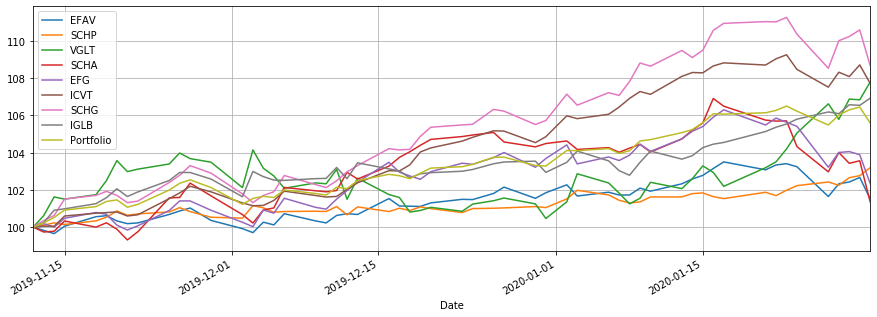

In [14]:
ana.graph({'SCHG':28,'SCHA':12,'EFG':11,'EFAV':9,'VGLT':20,'SCHP':10,'IGLB':6,'ICVT':4})